In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
(x_train,y_train),(x_test,y_test) =keras.datasets.mnist.load_data()

In [3]:
len(x_train)


60000

In [4]:
len(x_test)

10000

In [5]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

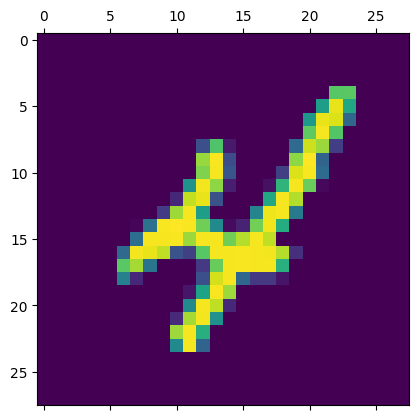

In [6]:
plt.matshow(x_train[9])

In [7]:
x_train=x_train/255
x_test=x_test/255
x_train_flat = x_train.reshape(len(x_train),28*28)
x_test_flat = x_test.reshape(len(x_test),28*28)
print(x_test_flat.shape)


(10000, 784)


In [8]:
model = keras.Sequential([
    keras.layers.Dense(150, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2504 - accuracy: 0.9280
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1083 - accuracy: 0.9679
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0741 - accuracy: 0.9779
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0543 - accuracy: 0.9831
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0416 - accuracy: 0.9868


In [9]:
model.evaluate(x_test_flat,y_test)
y_predicted = model.predict(x_test_flat)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([3.1880915e-04, 2.2854719e-03, 6.2691998e-01, 5.5684602e-01,
       4.4949036e-05, 9.0880897e-03, 1.2669132e-08, 9.9972540e-01,
       5.7041746e-02, 1.5202145e-01], dtype=float32)

In [10]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]


In [11]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    1,    1,    1,    1,    2,    1,    0,    1,    2],
       [   0, 1124,    3,    2,    0,    0,    3,    0,    3,    0],
       [   4,    2, 1009,    4,    2,    0,    3,    3,    5,    0],
       [   2,    0,    6,  977,    0,   17,    0,    3,    3,    2],
       [   1,    1,    4,    1,  955,    0,    3,    5,    2,   10],
       [   2,    0,    0,    6,    1,  874,    3,    1,    2,    3],
       [   5,    2,    0,    1,    2,    2,  946,    0,    0,    0],
       [   1,    9,   10,    3,    1,    0,    0,  999,    1,    4],
       [   7,    1,    4,    3,    3,    1,    2,    3,  946,    4],
       [   2,    6,    0,    5,    7,    6,    0,    4,    1,  978]])>